<a href="https://colab.research.google.com/github/anindabitm/ICLR-Workshop-Challenge-1-CGIAR-Computer-Vision-for-Crop-Disease/blob/master/ICLR_Starter_Aninda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Thanks hakymulla and Johnowhitaker for the excellent starter code. I will try and build on these**

In [0]:
import numpy as np
import pickle
import os
import glob
import pandas as pd
from google.colab import drive
import cv2
from PIL import Image
from pathlib import Path
import fastai
from fastai.vision import *
import torch

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/ICLR')

In [0]:
# First lets get out kaggle.json file
# Login to Kaggle, click on My Account and scroll down to the API section and click on Creat New API Token and save the kaggle.json file

In [0]:
# Upload the kaggle.json file on colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aninda","key":"65acd9fd14a064394b2bc202a483ee9b"}'}

In [0]:
#Create a directory called kaggle and copy the kaggle.json file in it
!mkdir '/content/drive/My Drive/ICLR/.kaggle/'
!cp kaggle.json '/content/drive/My Drive/ICLR/.kaggle/'

In [0]:
# download the dataset to kaggle
#i uploaded the needed data set on kaggle and i'm using the dataset kaggle API command
!kaggle datasets download -d hakymulla/cgiar-computer-vision-for-crop-disease

100% 2.99G/3.00G [01:06<00:00, 71.6MB/s]
100% 3.00G/3.00G [01:06<00:00, 48.3MB/s]


In [0]:
!chmod 600 '/content/drive/My Drive/ICLR/.kaggle/kaggle.json'

In [0]:
#!ls -ls '/content/drive/My Drive/ICLR/ICLR/train/train/stem_rust'|wc -l

377


In [0]:
# Extract the train and test folders
!unzip \*.zip;

Archive:  cgiar-computer-vision-for-crop-disease.zip
  inflating: ICLR/sample_submission.csv  
  inflating: ICLR/test/test/008FWT.JPG  
  inflating: ICLR/test/test/00AQXY.JPG  
  inflating: ICLR/test/test/01OJZX.JPG  
  inflating: ICLR/test/test/07OXKK.jfif  
  inflating: ICLR/test/test/085IEC.jpg  
  inflating: ICLR/test/test/08O2YE.JPG  
  inflating: ICLR/test/test/08WLJO.jfif  
  inflating: ICLR/test/test/0E1VTP.jfif  
  inflating: ICLR/test/test/0GJFRQ.JPG  
  inflating: ICLR/test/test/0J3PQ7.JPG  
  inflating: ICLR/test/test/0JIX2C.jpg  
  inflating: ICLR/test/test/0K9T9T.jpg  
  inflating: ICLR/test/test/0KAN82.JPG  
  inflating: ICLR/test/test/0KUZ3P.jfif  
  inflating: ICLR/test/test/0L5TC8.jpg  
  inflating: ICLR/test/test/0M9DP3.JPG  
  inflating: ICLR/test/test/0OATVC.jpg  
  inflating: ICLR/test/test/0SB9C6.JPG  
  inflating: ICLR/test/test/0Y28MS.jfif  
  inflating: ICLR/test/test/109IJP.jpg  
  inflating: ICLR/test/test/13GW8I.JPG  
  inflating: ICLR/test/test/1BBY5N.jfif

In [0]:
# Most of the code below is gotten from https://colab.research.google.com/drive/1vOYjjSMPHEFm_DGIM2nsV30xK-VaQZnV by Johnowhitaker
from fastai import * 
from fastai.vision import *

 **Nice to convert the jfif into jpg for consistency**

**This isn't essential but we may as well keep things consitent.**

In [0]:
# Fast AI doesn't read in .jfif by default, so we need this.
!sudo apt install imagemagick
!cd '/content/drive/My Drive/ICLR/ICLR/test/test'; mogrify -format jpg *.jfif
!cd '/content/drive/My Drive/ICLR/ICLR/train/train/healthy_wheat'; mogrify -format jpg *.jfif  
!cd '/content/drive/My Drive/ICLR/ICLR/train/train/leaf_rust'; mogrify -format jpg *.jfif  
!cd '/content/drive/My Drive/ICLR/ICLR/train/train/stem_rust'; mogrify -format jpg *.jfif 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [0]:
# Set up the databunch (replace content with your root directory)
data = ImageDataBunch.from_folder('/content/drive/My Drive/ICLR/ICLR/', train="train/", test='test/', valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
print(data.classes)

['healthy_wheat', 'leaf_rust', 'stem_rust']


In [0]:
data

ImageDataBunch;

Train: LabelList (614 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat
Path: /content/drive/My Drive/ICLR/ICLR;

Valid: LabelList (262 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,healthy_wheat
Path: /content/drive/My Drive/ICLR/ICLR;

Test: LabelList (610 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/ICLR/ICLR

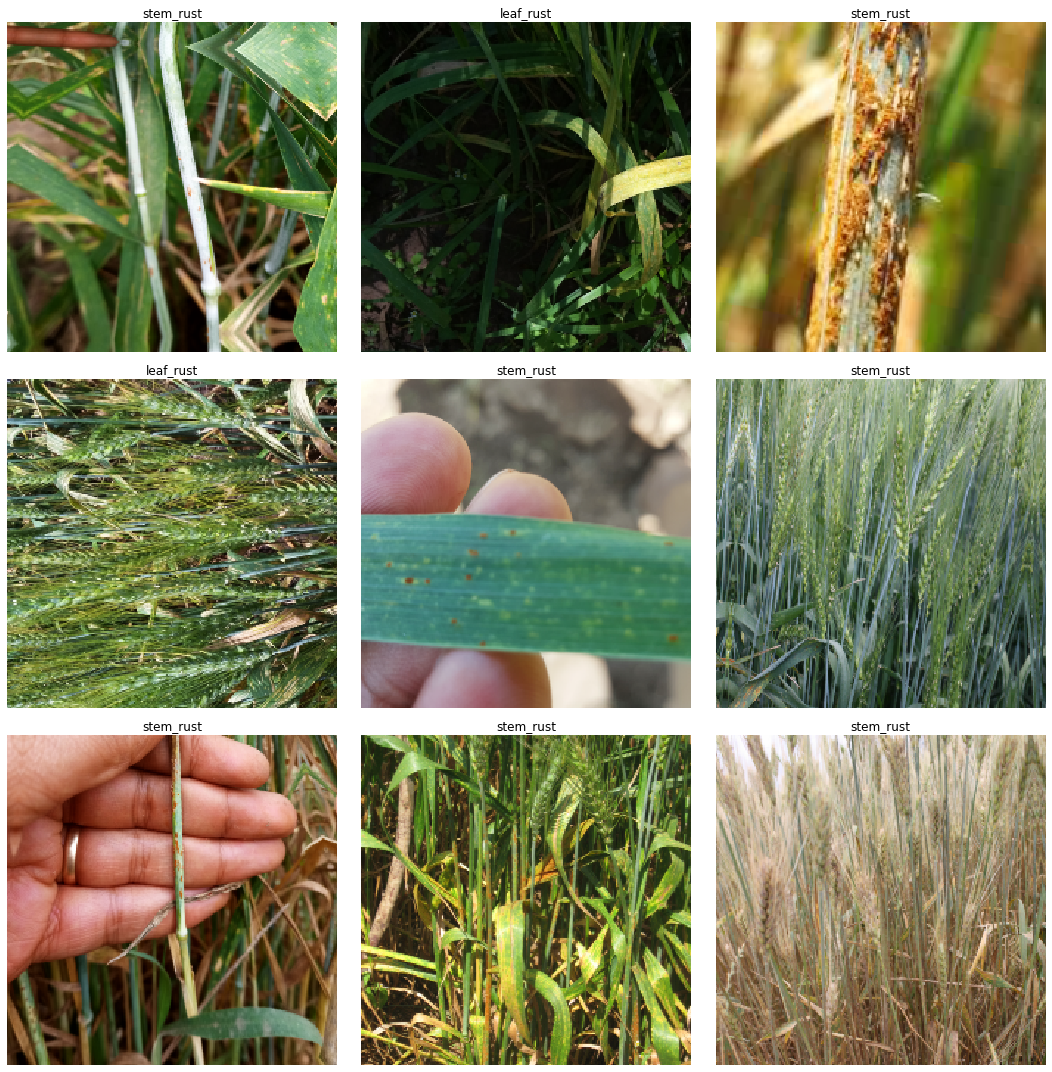

In [0]:
# Look at some examples
data.show_batch(rows=3, figsize=(15, 15)) 

In [0]:
model = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 1.45E-02


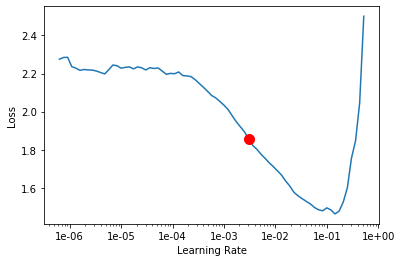

In [0]:
model.lr_find()
model.recorder.plot(suggestion=True)

In [0]:
# Fit
model.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.666352,0.832287,0.335878,0.664122,02:49
1,1.399350,0.747010,0.259542,0.740458,02:21
2,1.176603,0.754348,0.270992,0.729008,02:17


In [0]:
from fastai.callbacks import *

In [0]:
model.unfreeze()
model.fit_one_cycle(10, slice(1e-4,1e-2),callbacks=[SaveModelCallback(model, every='epoch', monitor='accuracy')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.821378,0.706500,0.229008,0.770992,02:11
1,0.741771,1.676699,0.248092,0.751908,02:12
2,0.740216,1.982424,0.263359,0.736641,02:09
3,0.662798,0.919930,0.202290,0.797710,02:18
4,0.576001,1.212899,0.183206,0.816794,02:18
5,0.524671,0.920393,0.171756,0.828244,02:18
6,0.448020,0.553360,0.137405,0.862595,02:18
7,0.378290,0.520931,0.125954,0.874046,02:15
8,0.324838,0.477992,0.114504,0.885496,02:15
9,0.278233,0.468835,0.114504,0.885496,02:11


In [0]:
model.save("trained_model", return_path=True)

PosixPath('/content/drive/My Drive/ICLR/ICLR/models/trained_model.pth')

In [0]:
#Prediction of the Test Set
preds_test, y_test = model.get_preds(DatasetType.Test)

In [0]:
import os
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('/content/drive/My Drive/ICLR/ICLR/test/test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(model.data.classes):
  submission[c] = preds_test[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,008FWT,0.914149,0.069718,0.016133
1,085IEC,0.000003,0.000385,0.999612
2,00AQXY,0.000540,0.999413,0.000047
3,01OJZX,0.914149,0.069718,0.016133
4,0K9T9T,0.000457,0.997678,0.001865


In [0]:
submission.to_csv('submission.csv', index = False)